# 0.) Import and Clean data

In [83]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [85]:
#drive.mount('/content/gdrive/', force_remount = True)

In [86]:
df = pd.read_csv('bank-additional-full (1).csv', sep=';')

In [87]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [88]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [89]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [90]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

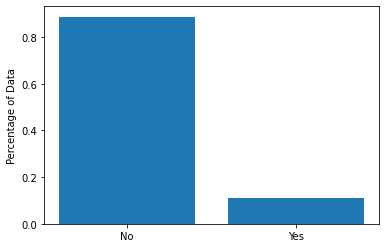

In [91]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [92]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()




#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [93]:
###############
###TRANSFORM###
###############

# Apply SMOTE only to the training data
smote = SMOTE()
X_train_resampled, y_train = smote.fit_resample(X_train, y_train)

# Scale the training data
scaler = StandardScaler().fit(X_train_resampled)
X_scaled = scaler.transform(X_train_resampled)

# Use the same scaler to scale the testing data
X_test = scaler.transform(X_test)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [94]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.378\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.676\ngini = 0.375\nsamples = 24032\nvalue = [18034, 5998]\nclass = No'),
 Text(0.125, 0.375, 'duration <= -0.634\ngini = 0.452\nsamples = 16957\nvalue = [11100, 5857]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.329\nsamples = 9691\nvalue = [7676, 2015]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.498\nsamples = 7266\nvalue = [3424.0, 3842.0]\nclass = Yes'),
 Text(0.375, 0.375, 'month_oct <= 4.193\ngini = 0.039\nsamples = 7075\nvalue = [6934, 141]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.032\nsamples = 6994\nvalue = [6881, 113]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.452\nsamples = 81\nvalue = [53, 28]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.676\ngini = 0.402\nsamples = 27128\nvalue = [7546.0, 19582.0]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 1.236\ngini = 0.316\nsamples = 22948\nvalue = [4520, 18428

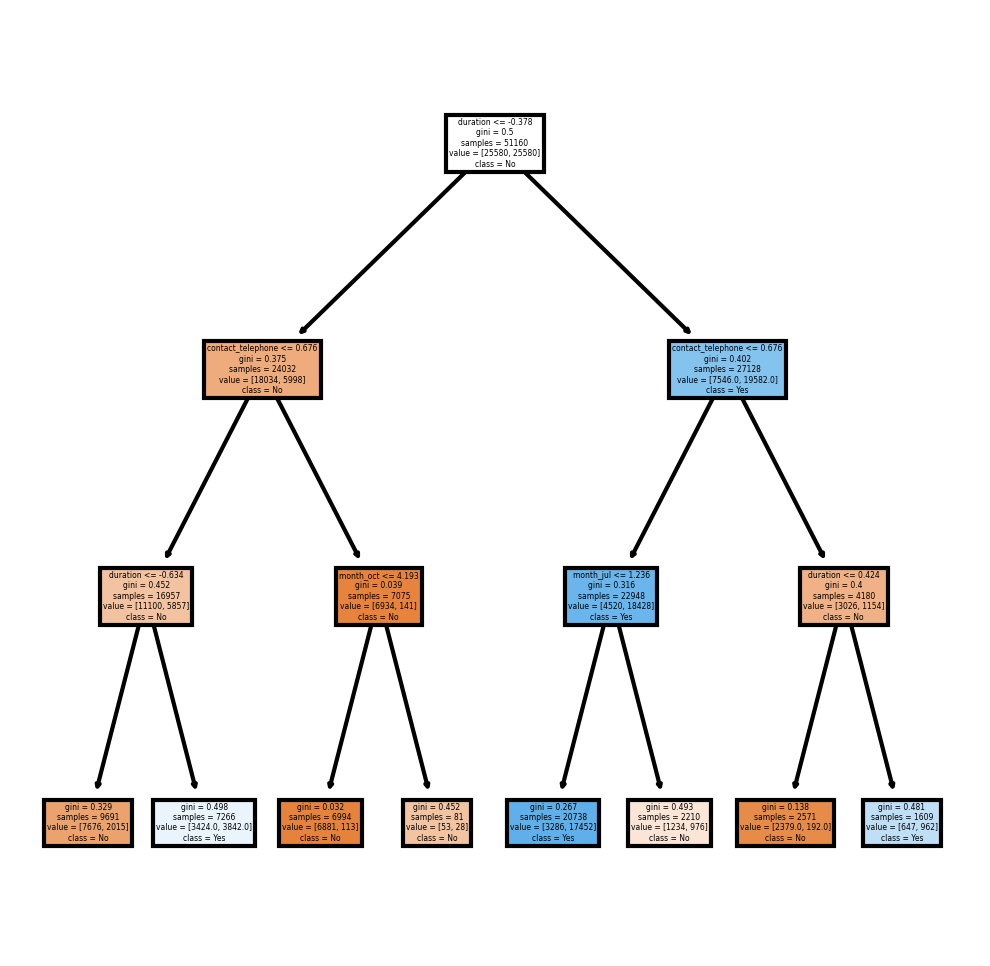

In [95]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [96]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

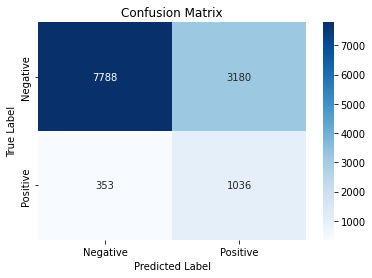

In [97]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [98]:
dtree = DecisionTreeClassifier(max_depth=3)

In [99]:
bagging = BaggingClassifier(estimator = dtree,
                            n_estimators= 100,
                            max_samples= .5,
                            max_features= 1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

In [100]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

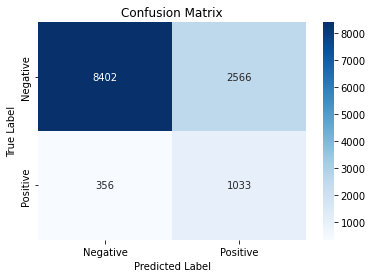

In [101]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
dtree = DecisionTreeClassifier(max_depth=3)

In [104]:
boost = AdaBoostClassifier(estimator = dtree,
                            n_estimators= 50)

boost.fit(X_scaled, y_train)

y_pred = boost.predict(X_test)

/Users/guxinyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [105]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

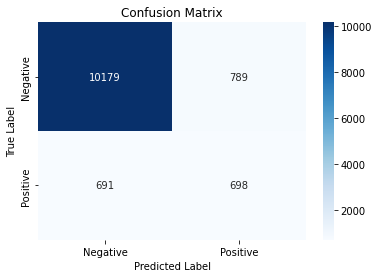

In [106]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) train a logistic regression on the decision tree, boosted tree, bagged tree.
## interpret coefficients and significance

In [107]:
from sklearn.linear_model import LogisticRegression


In [108]:
predictions_bagging = bagging.predict(X_test)
predictions_boost = boost.predict(X_test)
predictions_dtree_main = dtree_main.predict(X_test)

X_base_learner = np.column_stack([predictions_bagging, predictions_boost, predictions_dtree_main])

super_learner = LogisticRegression()
super_learner.fit(X_base_learner, y_test)

LogisticRegression()

In [112]:
super_learner.coef_


array([[1.2546148 , 1.7525109 , 0.62590746]])

- from the super learner coefficients, we can see that bagging and boost has larger impact on the log-odds relatively.

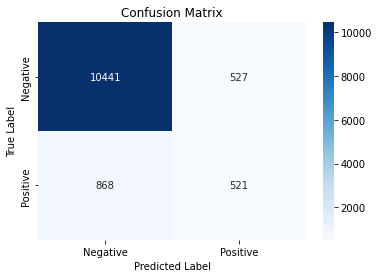

In [110]:
y_pred = super_learner.predict(X_base_learner)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble

Best Hyperparameters: {'base_estimator': LogisticRegression(), 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 50}
Best Accuracy Score: 0.9289999999999999
